In [1]:
# Importing important libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset and save it to churn variable

In [2]:
churn = pd.read_csv("Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Describing the dataset
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
churn.shape

(10000, 14)

### Finidng the Nulls or missing values

In [5]:
# checking for missing values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# getting unique count for each variable
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

from dataset, we do not require "RowNumber", "CustomerID", and "Surname", so dropping it

In [7]:
churn.drop(["RowNumber", "CustomerId", "Surname"],axis=1, inplace=True)

In [8]:
# review top 5 rows
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Notes:
- There are customers who have exited byt still have a bal in their account. why? 


In [9]:
# checking variable data type
churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Exoloratory Data Analysis

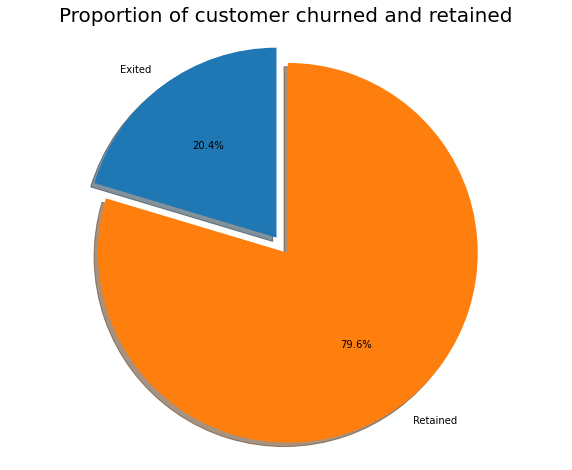

In [10]:
labels = 'Exited', 'Retained'
sizes = [churn.Exited[churn['Exited']==1].count(), churn.Exited[churn['Exited']==0].count()]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('Equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


About 20% of the customers have churned. SO the baseline model could be predict that 20% of the customers will churn. 

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

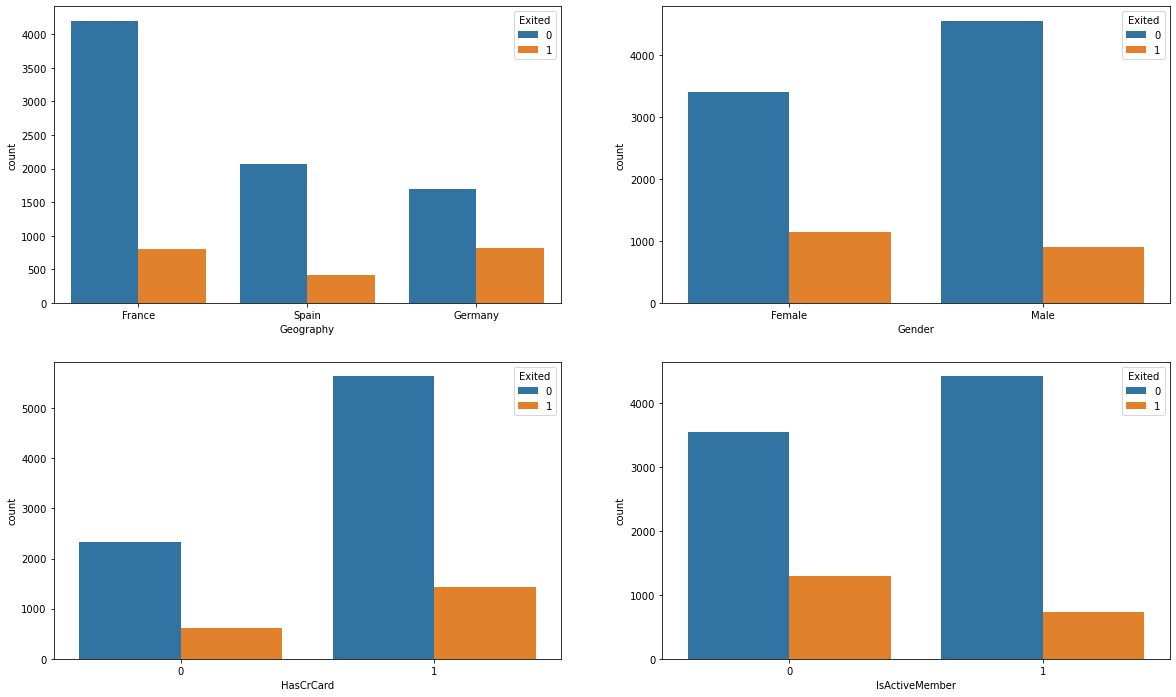

In [11]:
# First review the "Status" relation with categorical vars.

fig, ax = plt.subplots(2,2, figsize = (20,12))
sns.countplot(x = 'Geography', hue='Exited', data = churn, ax = ax[0][0])
sns.countplot(x = 'Gender', hue='Exited', data = churn, ax = ax[0][1])
sns.countplot(x = 'HasCrCard', hue='Exited', data = churn, ax = ax[1][0])
sns.countplot(x = 'IsActiveMember', hue='Exited', data = churn, ax = ax[1][1])

Notes: 
- Majority of data is person from France.
- The proportion of female customer churning is more than male customer
- More customer have churned with having Credit cards.
- The inactive members have a greater churn. 

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

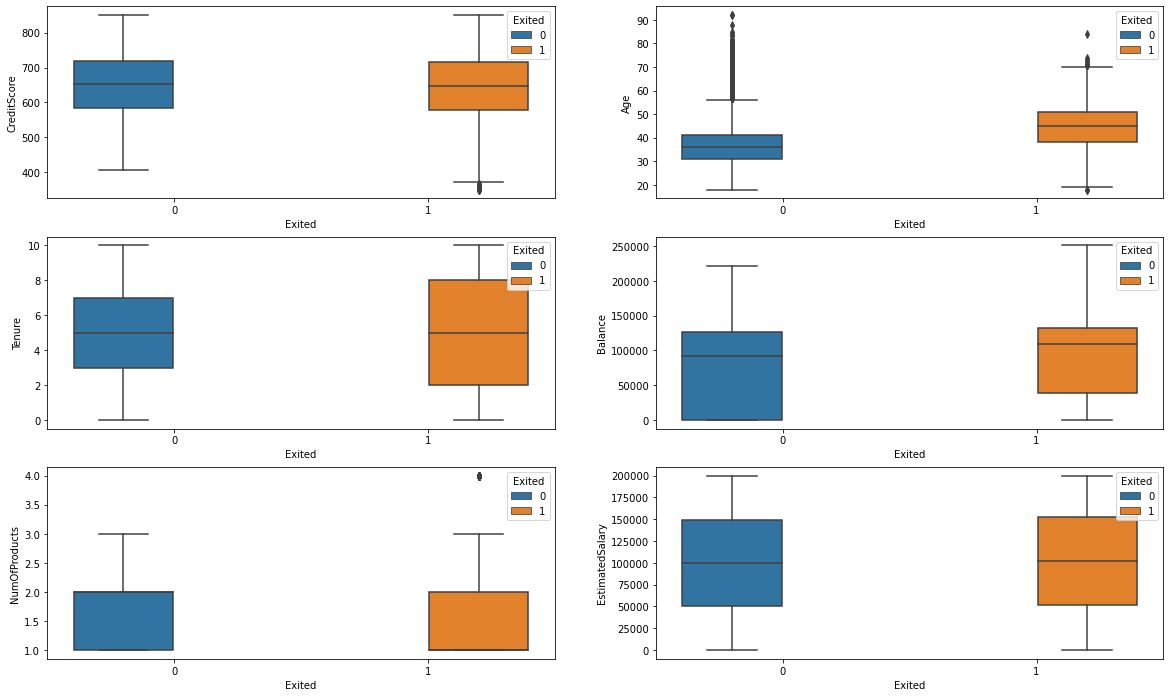

In [12]:
# Relations based on the continuous data attributes

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][1])

Notes:
- There is no significant diff in credit score distribution bet retained and churned customers.
- The older customer have churned at more than younger ones
- The clients on either extremen end are more likely to churn compare to that are average tenure
- The bank is loosing customers with significant bank bal which is likely to hit theri aval cap for lending
- Neither product nor the salary has significant effect on churning.

## Feature Engineering

In [13]:
# splitting train and test data

x_train = churn.sample(frac=0.8, random_state=42)
x_test = churn.drop(x_train.index)

print(len(x_train))
print(len(x_test))

8000
2000


(-1.0, 5.0)

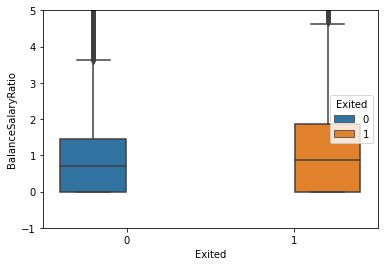

In [14]:
x_train["BalanceSalaryRatio"] = x_train.Balance / x_train.EstimatedSalary
sns.boxplot(y="BalanceSalaryRatio", x = 'Exited', hue= "Exited", data=x_train)
plt.ylim(-1,5)

it is seen that, the salary has little effect on chance of a customer churn. whereas, the ratio of work balance and estimated salary indicated that customers with higher bal salary ratio chun more which would be worrying to bank as the impacts their source of loan capitals


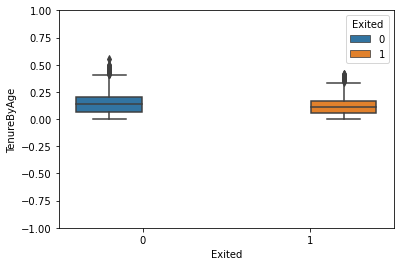

In [15]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
x_train['TenureByAge'] = x_train.Tenure / (x_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = x_train)
plt.ylim(-1, 1)
plt.show()

In [16]:
# Lets add new vaiable to capture credit score given age to take into accout

x_train["CreditScoreGivenAge"] = x_train.CreditScore / (x_train.Age)

In [17]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
6252,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0,2.314258,0.093750,18.625000
4684,623,France,Male,43,1,0.00,2,1,1,146379.30,0,0.000000,0.023256,14.488372
1731,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0,0.000000,0.090909,13.659091
4742,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0,0.698103,0.135593,8.576271
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,1.090052,0.259259,20.740741


## Data Preparation for model fitting

In [18]:
# Arrange columns by data type for better manupulation

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
x_train = x_train[['Exited'] + continuous_vars + cat_vars]
x_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
6252,0,596,32,3,96709.07,2,41788.37,2.314258,0.093750,18.625000,0,0,Germany,Male
4684,0,623,43,1,0.00,2,146379.30,0.000000,0.023256,14.488372,1,1,France,Male
1731,0,601,44,4,0.00,2,58561.31,0.000000,0.090909,13.659091,1,0,Spain,Female
4742,0,506,59,8,119152.10,2,170679.74,0.698103,0.135593,8.576271,1,1,Germany,Male
4521,0,560,27,7,124995.98,1,114669.79,1.090052,0.259259,20.740741,1,1,Spain,Female


## One-Hot Encoding 

In [19]:
x_train.loc[x_train.HasCrCard == 0, 'HasCrCard'] = -1
x_train.loc[x_train.IsActiveMember == 0, 'IsActiveMember'] = -1
x_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
6252,0,596,32,3,96709.07,2,41788.37,2.314258,0.093750,18.625000,-1,-1,Germany,Male
4684,0,623,43,1,0.00,2,146379.30,0.000000,0.023256,14.488372,1,1,France,Male
1731,0,601,44,4,0.00,2,58561.31,0.000000,0.090909,13.659091,1,-1,Spain,Female
4742,0,506,59,8,119152.10,2,170679.74,0.698103,0.135593,8.576271,1,1,Germany,Male
4521,0,560,27,7,124995.98,1,114669.79,1.090052,0.259259,20.740741,1,1,Spain,Female


In [20]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (x_train[i].dtype == np.str or x_train[i].dtype == np.object):
        for j in x_train[i].unique():
            x_train[i+'_'+j] = np.where(x_train[i] == j,1,-1)
        remove.append(i)
x_train = x_train.drop(remove, axis=1)
x_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
6252,0,596,32,3,96709.07,2,41788.37,2.314258,0.093750,18.625000,-1,-1,1,-1,-1,1,-1
4684,0,623,43,1,0.00,2,146379.30,0.000000,0.023256,14.488372,1,1,-1,1,-1,1,-1
1731,0,601,44,4,0.00,2,58561.31,0.000000,0.090909,13.659091,1,-1,-1,-1,1,-1,1
4742,0,506,59,8,119152.10,2,170679.74,0.698103,0.135593,8.576271,1,1,1,-1,-1,1,-1
4521,0,560,27,7,124995.98,1,114669.79,1.090052,0.259259,20.740741,1,1,-1,-1,1,-1,1


In [21]:
# minMax scaling the continuous variables
minVec = x_train[continuous_vars].min().copy()
maxVec = x_train[continuous_vars].max().copy()
x_train[continuous_vars] = (x_train[continuous_vars]-minVec)/(maxVec-minVec)
x_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
6252,0,0.492,0.189189,0.3,0.385452,0.333333,0.208904,0.000218,0.168750,0.311633,-1,-1,1,-1,-1,1,-1
4684,0,0.546,0.337838,0.1,0.000000,0.333333,0.731908,0.000000,0.041860,0.210886,1,1,-1,1,-1,1,-1
1731,0,0.502,0.351351,0.4,0.000000,0.333333,0.292777,0.000000,0.163636,0.190689,1,-1,-1,-1,1,-1,1
4742,0,0.312,0.554054,0.8,0.474902,0.333333,0.853422,0.000066,0.244068,0.066896,1,1,1,-1,-1,1,-1
4521,0,0.420,0.121622,0.7,0.498194,0.000000,0.573346,0.000103,0.466667,0.363162,1,1,-1,-1,1,-1,1


In [22]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

## Model Fitting and selection
For Model:
- Logistic Regression in the primal space and with differnt kernel
- SVM in the primal and with different kernels
- Ensemble models

In [23]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [24]:
# Creating function to give best model score and parameter

def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [25]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)
best_model(log_primal_Grid)

0.8139999999999998
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [26]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],
                'intercept_scaling':[1],'penalty':['l2'], 'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(x_train.loc[:, x_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),
                            param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,x_train.Exited)
best_model(log_pol2_Grid)

0.859375
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [27]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)
best_model(SVM_grid)

0.8541255111303135
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [28]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],
                'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)
best_model(SVM_grid)

0.8551258080736908
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [29]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],  
                'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)
best_model(RanFor_grid)

0.8666250000000002
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=7,
                       n_estimators=50)


In [30]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 
                'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)
best_model(xgb_grid)

0.865375
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 10}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


### Fit Best Model

In [32]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, 
                                fit_intercept=True,intercept_scaling=1, max_iter=250, 
                                multi_class='ovr',n_jobs=None, penalty='l2', random_state=None, 
                                solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)

LogisticRegression(C=100, max_iter=250, multi_class='ovr', tol=1e-05)

In [34]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(x_train.loc[:, x_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=300, multi_class='ovr', 
                                n_jobs=None, penalty='l2', random_state=None, 
                                solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,x_train.Exited)

LogisticRegression(C=10, max_iter=300, multi_class='ovr', solver='liblinear')

In [35]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, 
                decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, 
                probability=True, random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [36]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', 
              degree=2, gamma=0.1, kernel='poly',  max_iter=-1, probability=True, random_state=None, 
              shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [38]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, 
                            max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,
                            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [39]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, 
                    gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, 
                    nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(x_train.loc[:, x_train.columns != 'Exited'],x_train.Exited)

[16:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=5,
              missing=None, monotone_constraints='()', n_estimators=20,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

Review best model fit accuracy : Keen interest is on the performance in predicting 1's (Customers who churn)

In [40]:
print(classification_report(x_train.Exited, log_primal.predict(x_train.loc[:, x_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6373
           1       0.64      0.22      0.33      1627

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.61      8000
weighted avg       0.79      0.82      0.78      8000



In [41]:
print(classification_report(x_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6373
           1       0.77      0.46      0.57      1627

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [42]:
print(classification_report(x_train.Exited,  SVM_RBF.predict(x_train.loc[:, x_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6373
           1       0.84      0.41      0.55      1627

    accuracy                           0.86      8000
   macro avg       0.85      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [43]:
print(classification_report(x_train.Exited,  SVM_POL.predict(x_train.loc[:, x_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6373
           1       0.84      0.38      0.52      1627

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [44]:
print(classification_report(x_train.Exited,  RF.predict(x_train.loc[:, x_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6373
           1       0.89      0.51      0.65      1627

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



In [46]:
print(classification_report(x_train.Exited,  XGB.predict(x_train.loc[:, x_train.columns != 'Exited'])))

XGBoostError: [16:52:43] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

In [47]:
y = x_train.Exited
X = x_train.loc[:, x_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),
                                                        log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),
                                                        log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

XGBoostError: [16:55:06] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

NameError: name 'fpr_XGB' is not defined

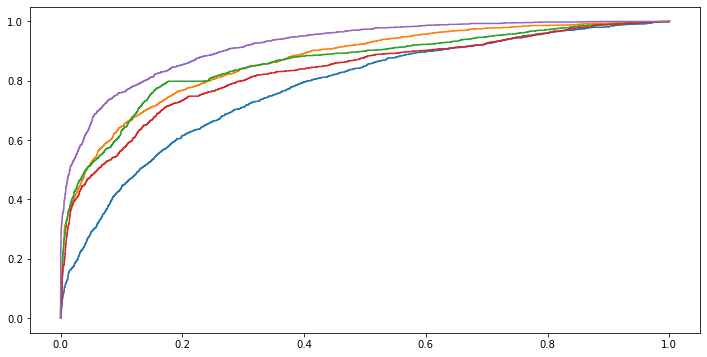

In [48]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Test model prediction accuracy on test data

In [49]:
# Make the data transformation for test data
df_test = DfPrepPipeline(x_test,x_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(1992, 17)

In [50]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1583
           1       0.84      0.36      0.51       409

    accuracy                           0.86      1992
   macro avg       0.85      0.67      0.71      1992
weighted avg       0.85      0.86      0.83      1992



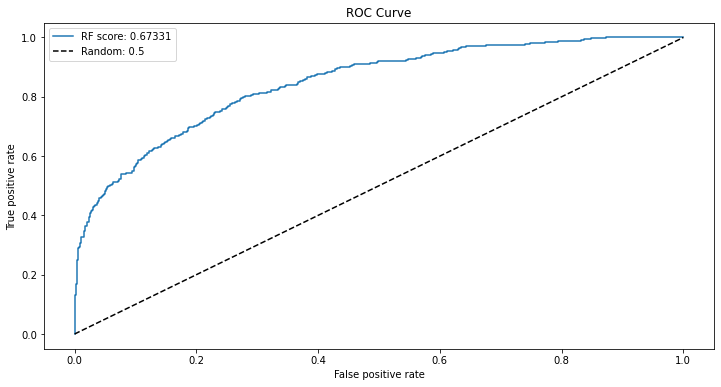

In [51]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()